In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

# Read data files and update column names
x_train=pd.read_csv('X_train.csv', header=None)
y_train=pd.read_csv('y_train.csv', header=None)
x_test=pd.read_csv('X_test.csv', header=None)
y_test=pd.read_csv('y_test.csv', header=None)

t=np.ones(len(x_train))
x_train[5] = pd.Series(t)

r=np.ones(len(x_test))
x_test[5] = pd.Series(r)

y_test = y_test.as_matrix()
y_train = y_train.as_matrix()
x_test = x_test.as_matrix()
x_train = x_train.as_matrix()

/Users/mollyhanson/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def getW(dfx,dfy):
    a = np.dot(dfx.T,dfx)
    a_inv = np.linalg.inv(a)
    b = np.dot(a_inv,dfx.T)
    w = np.dot(b,dfy)
    return w

def predict(X,w):
    pred = np.dot(X,w)
    return np.sign(pred)


In [3]:
# epi_alph_list = []
w_list = []
alpha_list = []
epi_list = []

fboost = np.zeros(len(y_train))
train_err_list = []

fboost_test = np.zeros(len(y_test))
test_err_list = []

hist_counter = np.zeros(len(x_train))

n = len(x_train)
n_test = len(x_test)
weight = np.full(len(x_train), (1.0/len(x_train)))

#Run boosted classifier for 1500 rounds
for t in range(1500):
    idx = np.random.choice(range(n), n, replace=True, p=weight)
    x_i = x_train[idx,:]
    y_i = y_train[idx]
    w = getW(x_i,y_i)
    
    for i in idx:
        hist_counter[i] += 1
    
    train_predict = predict(x_train,w)
    test_predict = predict(x_test,w)
    
    epi = 0
    for i in range(n):
        if train_predict[i] != y_train[i]:
            epi += weight[i]
    
    # change sign of regression vector if epislon > 0.5
    if epi > 0.5:
        epi = 0
        w=-w
        train_predict = predict(x_train,w)
        test_predict = predict(x_test,w)
        for i in range(n):
            if train_predict[i] != y_train[i]:
                epi += weight[i]
    
    #calculate alpha, then append alpha and epislon to a list
    w_list.append(w)
    alpha = 0.5 * math.log((1 - epi) / epi)
    
#     epi_alph_list.append((t,epi,alpha,w))
    alpha_list.append(alpha)
    epi_list.append(epi)
    
    for i in range(n):
        expon = np.exp(-alpha * y_train[i] * train_predict[i])
        weight[i] = weight[i]*expon

    weight_sum = sum(weight)
    for i in range(n):
        weight[i] = weight[i]/weight_sum
    

#Calculating Test + Train Error
for t in range(1500):
    #Calculate TRAIN ERROR
    oh = predict(x_train,w_list[t])
    newboost = alpha_list[t] * oh.T[0]
    fboost = fboost + newboost
    
    train_err_num=float(0)
    for i in range(n):
        fboost_i = fboost[i]
        if y_train[i]!=np.sign(fboost_i):
            train_err_num+=1
    
    train_err = train_err_num/n
    train_err_list.append(train_err)
    
    #Calculate TEST ERROR
    oh_test = predict(x_test,w_list[t])
    newboost_test = alpha_list[t] * oh_test.T[0]
    fboost_test = fboost_test + newboost_test
    
    test_err_num=float(0)
    for i in range(n_test):
        fboost_i_test = fboost_test[i]
        if y_test[i]!=np.sign(fboost_i_test):
            test_err_num+=1
    
    test_err = test_err_num/n_test
    test_err_list.append(test_err)


In [4]:

t_vals = range(1500)


In [5]:
plt.plot(t_vals,train_err_list,'-r')
plt.plot(t_vals,test_err_list,'-b')
plt.xlabel('$t$')
plt.ylabel('Error')
plt.title('Training and Test error of $f_{boost}^{(t)}(.)$ for $t$=1,...,$T$')
plt.legend(['Train Error','Test Error'])

In [9]:
## PART B
# epis = [x[1] for x in epi_alph_list]
epis = np.asarray(epi_list)
target = np.square(0.5-epis)
targetlist = target.tolist()
up_list = []

sample = 0
for i in targetlist:
    sample = sample+i
    up_list.append(sample)

up_list_array = np.asarray(up_list)
upbound_array = np.exp(-2*up_list_array)

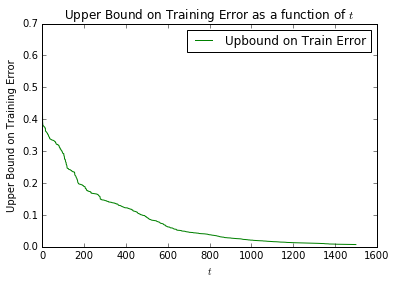

In [10]:
plt.plot(t_vals,upbound_array,'-g')
plt.xlabel('$t$')
plt.ylabel('Upper Bound on Training Error')
plt.title('Upper Bound on Training Error as a function of $t$')
plt.legend(['Upbound on Train Error'])

In [11]:
## PART C

x_range = range(x_train.shape[0])
plt.bar(x_range,hist_counter)
plt.xlabel('Data Point')
plt.ylabel('Number of times data point \n was selected by the bootstrap')
plt.title('Number of times each training data point was selected by the bootstrap across all rounds')

In [12]:
## PART D

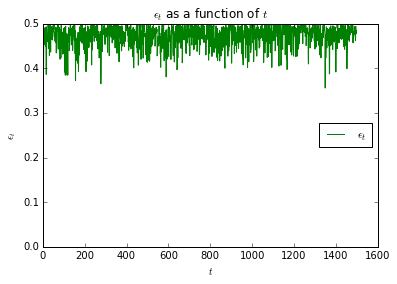

In [20]:
plt.plot(t_vals,epi_list,'-g')
plt.xlabel('$t$')
plt.ylabel('$\epsilon_t$')
plt.title('$\epsilon_t$ as a function of $t$')
plt.legend(['$\epsilon_t$'], loc='center right')

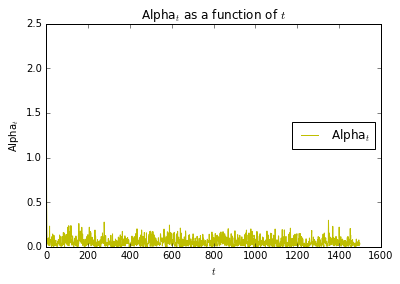

In [27]:
plt.plot(t_vals,alpha_list,'-y')
plt.xlabel('$t$')
plt.ylabel('Alpha$_t$')
plt.title('Alpha$_t$ as a function of $t$')
plt.legend(['Alpha$_t$'], loc='center right')